In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

import pickle
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')


df = pd.read_csv('/content/sentiment_dataset.csv')
df = df[['review', 'sentiment']].dropna()
df.columns = ['review', 'sentiment']
df1=pd.DataFrame(df)
df1.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,review,sentiment
0,"Not bad, not great either.",Neutral
1,Worst product I've ever bought.,Negative
2,This product is wonderful. Super happy!,Positive
3,Low quality and very frustrating.,Negative
4,This product is wonderful. Super happy!,Positive


In [32]:
print("Dataset shape:", df.shape)
print("Duplicate rows:", df.duplicated().sum())


Dataset shape: (10000, 3)
Duplicate rows: 9982


In [46]:
print(df.duplicated().sum())


9982


In [45]:
print(df['sentiment'].value_counts())


sentiment
Negative    3439
Positive    3294
Neutral     3267
Name: count, dtype: int64


In [16]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [17]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

df['clean_review'] = df['review'].apply(preprocess)


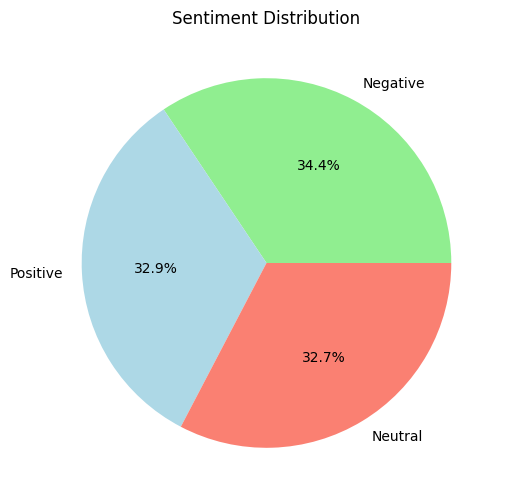

In [35]:
plt.figure(figsize=(6,6))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'salmon'])
plt.title("Sentiment Distribution")
plt.ylabel('')
plt.show()


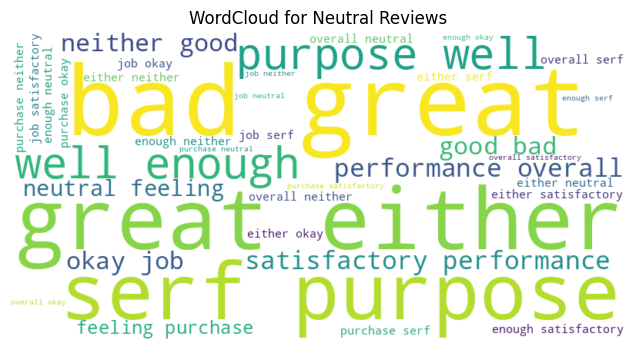

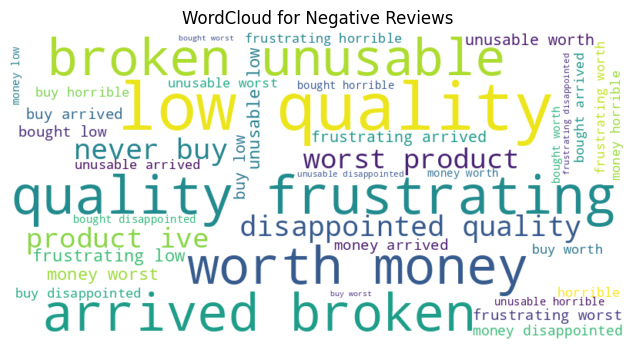

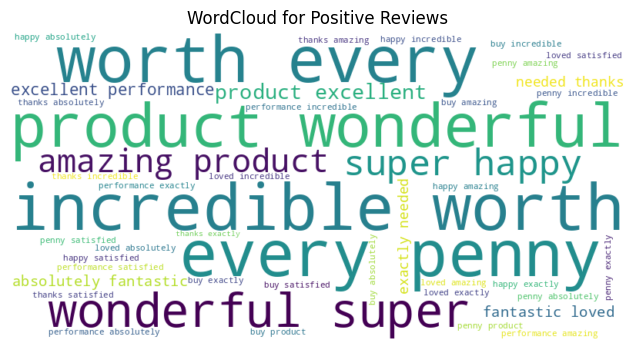

In [19]:
for sentiment in df['sentiment'].unique():
    text = " ".join(df[df['sentiment'] == sentiment]['clean_review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment} Reviews")
    plt.show()

In [37]:
# 4. TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_review'])
y = df['sentiment']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, )

<Figure size 800x500 with 0 Axes>

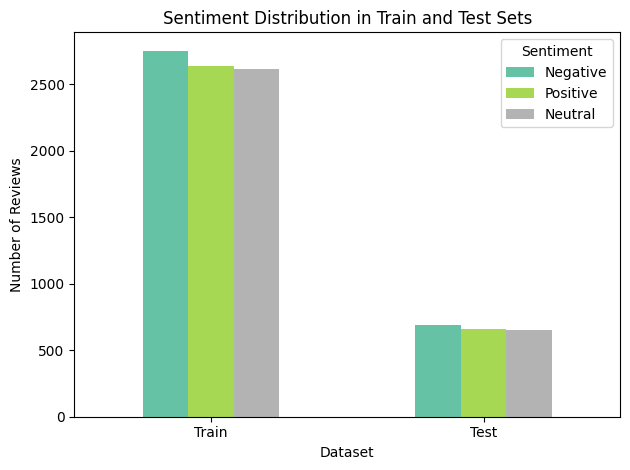

In [47]:
# Distribution in Train and Test sets
train_dist = y_train.value_counts()
test_dist = y_test.value_counts()

# Combine into a DataFrame for visualization
dist_df = pd.DataFrame({
    'Train': train_dist,
    'Test': test_dist
}).T
plt.figure(figsize=(8, 5))
dist_df.plot(kind='bar', stacked=False, colormap='Set2')
plt.title('Sentiment Distribution in Train and Test Sets')
plt.xlabel('Dataset')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


In [39]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayes": BernoulliNB()
}



Logistic Regression Results:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       688
     Neutral       1.00      1.00      1.00       653
    Positive       1.00      1.00      1.00       659

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



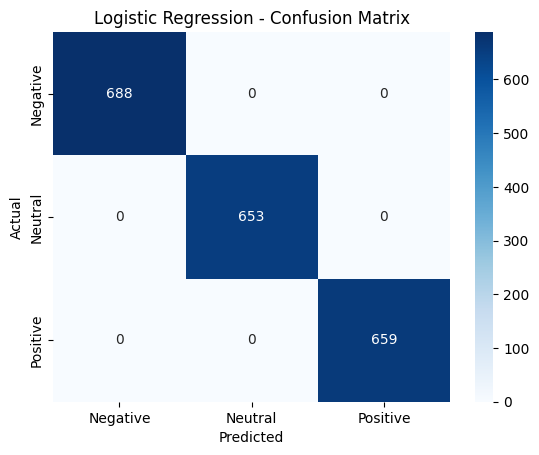


SVM Results:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       688
     Neutral       1.00      1.00      1.00       653
    Positive       1.00      1.00      1.00       659

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



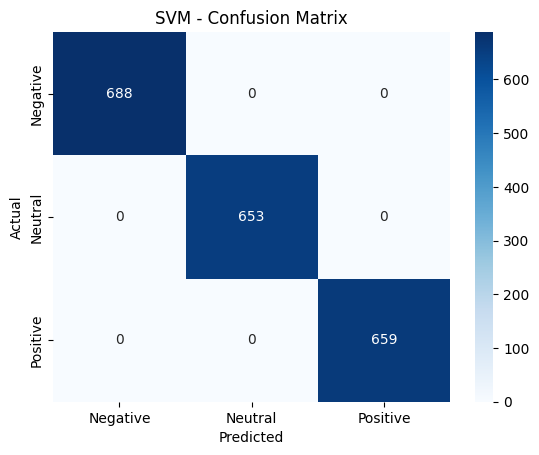


Random Forest Results:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       688
     Neutral       1.00      1.00      1.00       653
    Positive       1.00      1.00      1.00       659

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



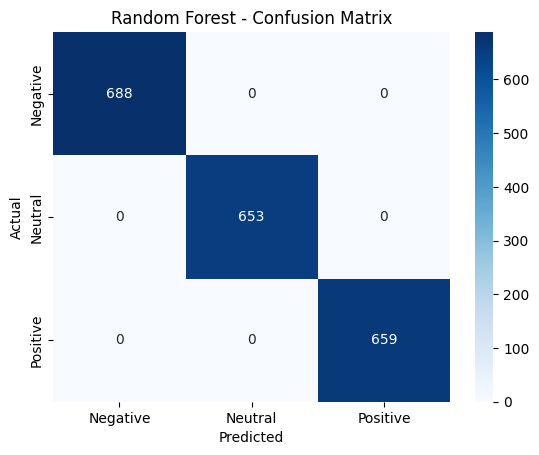


Naive Bayes Results:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       688
     Neutral       1.00      1.00      1.00       653
    Positive       1.00      1.00      1.00       659

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



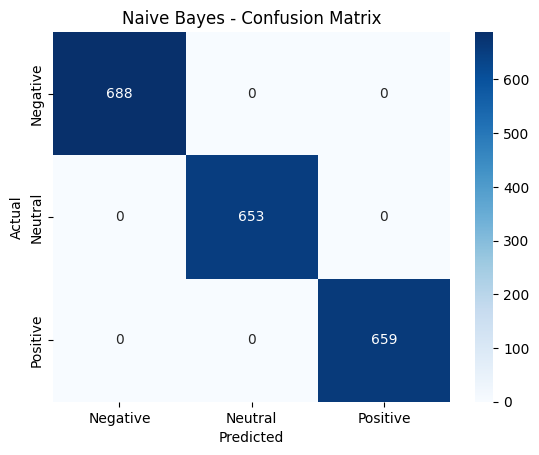

In [40]:
for name, model in models.items():
    print(f"\n{name} Results:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [41]:
best_model = models['Logistic Regression']
pickle.dump(best_model, open('sentiment_model.pkl', 'wb'))
pickle.dump(vectorizer, open('tfidf_vectorizer.pkl', 'wb'))


In [43]:
def predict_sentiment(review):
    review = preprocess(review)
    vector = vectorizer.transform([review])
    pred = best_model.predict(vector)[0]
    return pred


In [44]:
while True:
    user_input = input("\nEnter a product review (or 'exit' to stop): ")
    if user_input.lower() == 'exit':
        break
    print(f"Predicted Sentiment: {predict_sentiment(user_input)}")


Enter a product review (or 'exit' to stop): The product was fine
Predicted Sentiment: Positive

Enter a product review (or 'exit' to stop): but delivery was terrible
Predicted Sentiment: Neutral

Enter a product review (or 'exit' to stop): exit


In [48]:
from sklearn.metrics import accuracy_score

accuracy_scores = {}

print("\nModel Accuracy Comparison:")
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
    accuracy_scores[name] = acc
    print(f"{name}: {acc:.2f}%")



Model Accuracy Comparison:
Logistic Regression: 100.00%
SVM: 100.00%
Random Forest: 100.00%
Naive Bayes: 100.00%


In [31]:
print(predict_sentiment("This product is average, but delivery was late."))
print(predict_sentiment("Absolutely horrible experience."))


Positive
Negative
